In [5]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Step 3: Load the CSV file
# Replace with your Google Drive path, e.g., '/content/drive/My Drive/Data/Unemployment_Rate_upto_11_2020.csv'
file_path = '/content/Unemployment_Rate_upto_11_2020.csv'
df = pd.read_csv(file_path)

# Display first 5 rows to verify data
print("First 5 Rows of the Dataset:")
print(df.head())

# Display dataset info
print("\nDataset Info:")
print(df.info())

First 5 Rows of the Dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.

In [9]:
# Step 4: Data Cleaning
# Rename columns for consistency (remove special characters, simplify names)
df.columns = ['State', 'Date', 'Frequency', 'Unemployment_Rate', 'Estimated_Employed',
              'Labour_Participation_Rate', 'Region', 'Longitude', 'Latitude']

# Convert Date to datetime
df['Date'] = df['Date'].str.strip() # Remove leading/trailing whitespace
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (fill numeric columns with mean, if any)
for col in ['Unemployment_Rate', 'Estimated_Employed', 'Labour_Participation_Rate']:
    df[col] = df[col].fillna(df[col].mean())

# Drop duplicates
print("\nNumber of Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()


Missing Values:
State                        0
Date                         0
Frequency                    0
Unemployment_Rate            0
Estimated_Employed           0
Labour_Participation_Rate    0
Region                       0
Longitude                    0
Latitude                     0
dtype: int64

Number of Duplicates: 0


In [10]:
# Step 5: Exploratory Data Analysis (EDA)
# Summary statistics
print("\nSummary Statistics:")
print(df[['Unemployment_Rate', 'Estimated_Employed', 'Labour_Participation_Rate']].describe())


Summary Statistics:
       Unemployment_Rate  Estimated_Employed  Labour_Participation_Rate
count         267.000000        2.670000e+02                 267.000000
mean           12.236929        1.396211e+07                  41.681573
std            10.803283        1.336632e+07                   7.845419
min             0.500000        1.175420e+05                  16.770000
25%             4.845000        2.838930e+06                  37.265000
50%             9.650000        9.732417e+06                  40.390000
75%            16.755000        2.187869e+07                  44.055000
max            75.850000        5.943376e+07                  69.690000


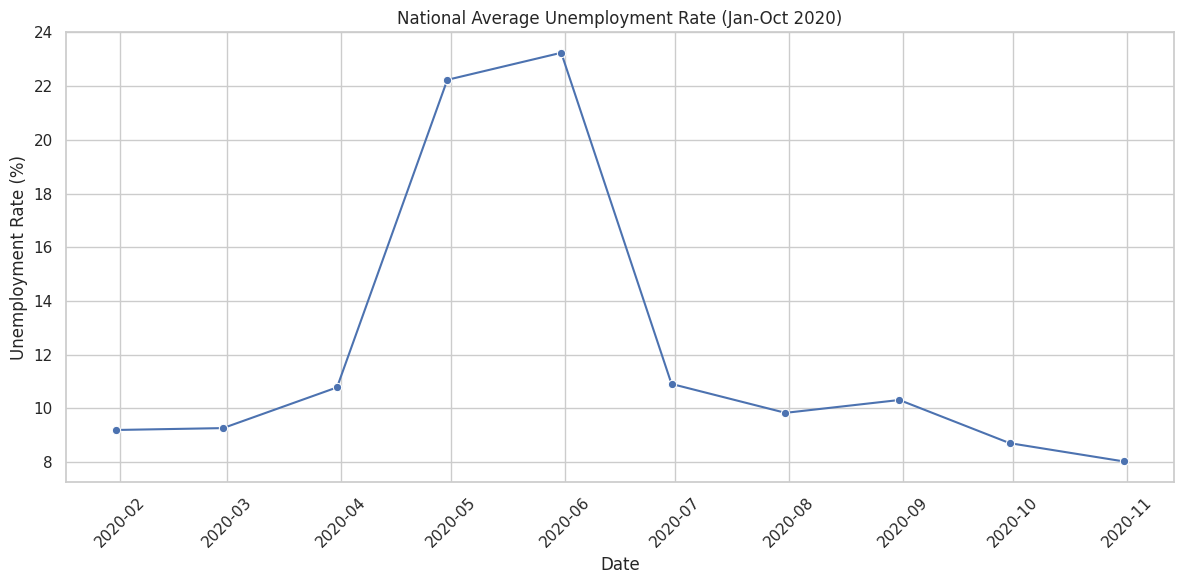

In [11]:
# Step 6: Visualize Unemployment Trends Over Time (National Average)
# Calculate monthly national average unemployment rate
national_avg = df.groupby('Date')['Unemployment_Rate'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Unemployment_Rate', data=national_avg, marker='o')
plt.title('National Average Unemployment Rate (Jan-Oct 2020)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Unemployment Rates:
Pre-COVID (Jan-Mar 2020): 9.76%
COVID Peak (Apr-May 2020): 22.75%
Post-Peak (Jun-Oct 2020): 9.56%


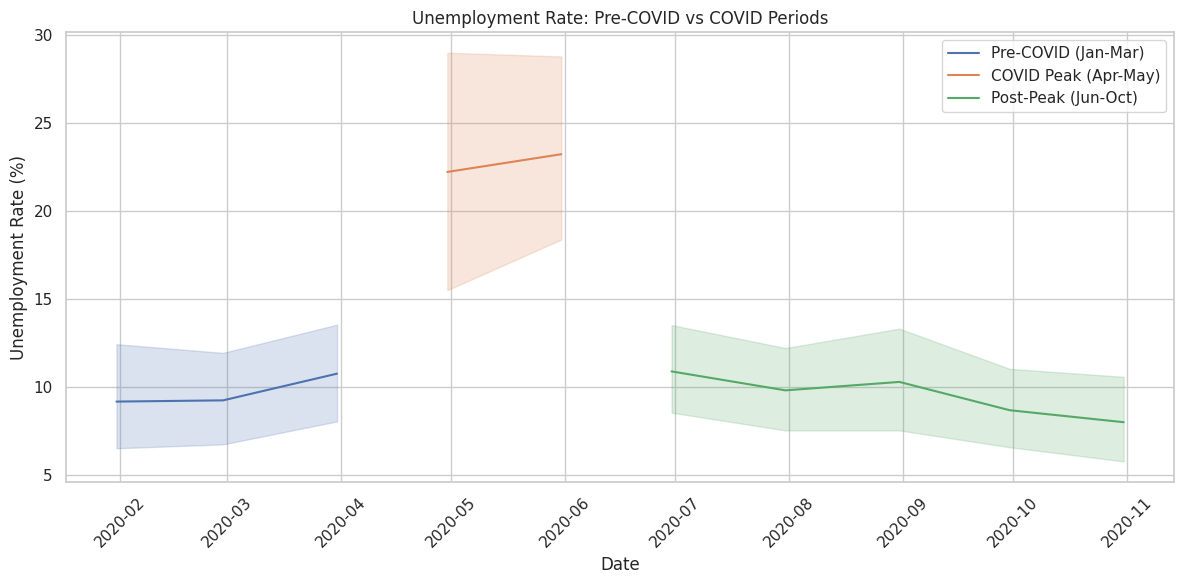

In [12]:
# Step 7: Investigate COVID-19 Impact
# Define pre-COVID (Jan-Mar 2020) and COVID peak (Apr-May 2020) periods
pre_covid = df[df['Date'] < '2020-04-01']
covid_peak = df[(df['Date'] >= '2020-04-01') & (df['Date'] <= '2020-05-31')]
post_peak = df[df['Date'] > '2020-05-31']

# Calculate average unemployment rates
pre_covid_avg = pre_covid['Unemployment_Rate'].mean()
covid_peak_avg = covid_peak['Unemployment_Rate'].mean()
post_peak_avg = post_peak['Unemployment_Rate'].mean()

print("\nAverage Unemployment Rates:")
print(f"Pre-COVID (Jan-Mar 2020): {round(pre_covid_avg, 2)}%")
print(f"COVID Peak (Apr-May 2020): {round(covid_peak_avg, 2)}%")
print(f"Post-Peak (Jun-Oct 2020): {round(post_peak_avg, 2)}%")

# Plot pre-COVID vs COVID periods
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Unemployment_Rate', data=pre_covid, label='Pre-COVID (Jan-Mar)')
sns.lineplot(x='Date', y='Unemployment_Rate', data=covid_peak, label='COVID Peak (Apr-May)')
sns.lineplot(x='Date', y='Unemployment_Rate', data=post_peak, label='Post-Peak (Jun-Oct)')
plt.title('Unemployment Rate: Pre-COVID vs COVID Periods')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

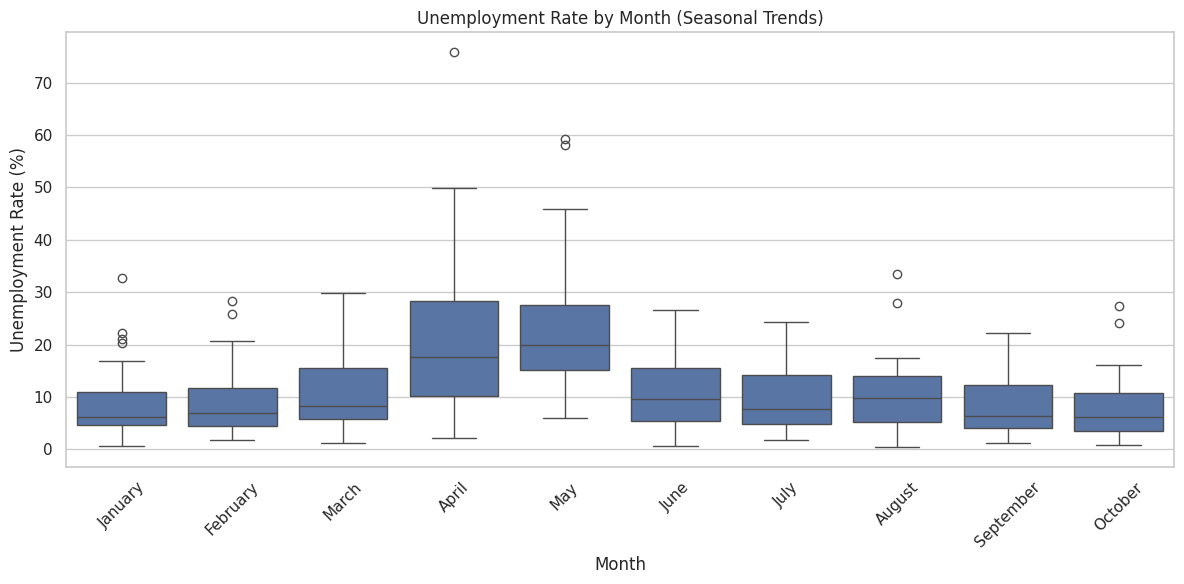

In [13]:
# Step 8: Seasonal Trends (Monthly Patterns)
# Extract month name for seasonal analysis
df['Month'] = df['Date'].dt.strftime('%B')

# Plot unemployment rate by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Unemployment_Rate', data=df, order=['January', 'February', 'March',
                                                              'April', 'May', 'June',
                                                              'July', 'August', 'September', 'October'])
plt.title('Unemployment Rate by Month (Seasonal Trends)')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

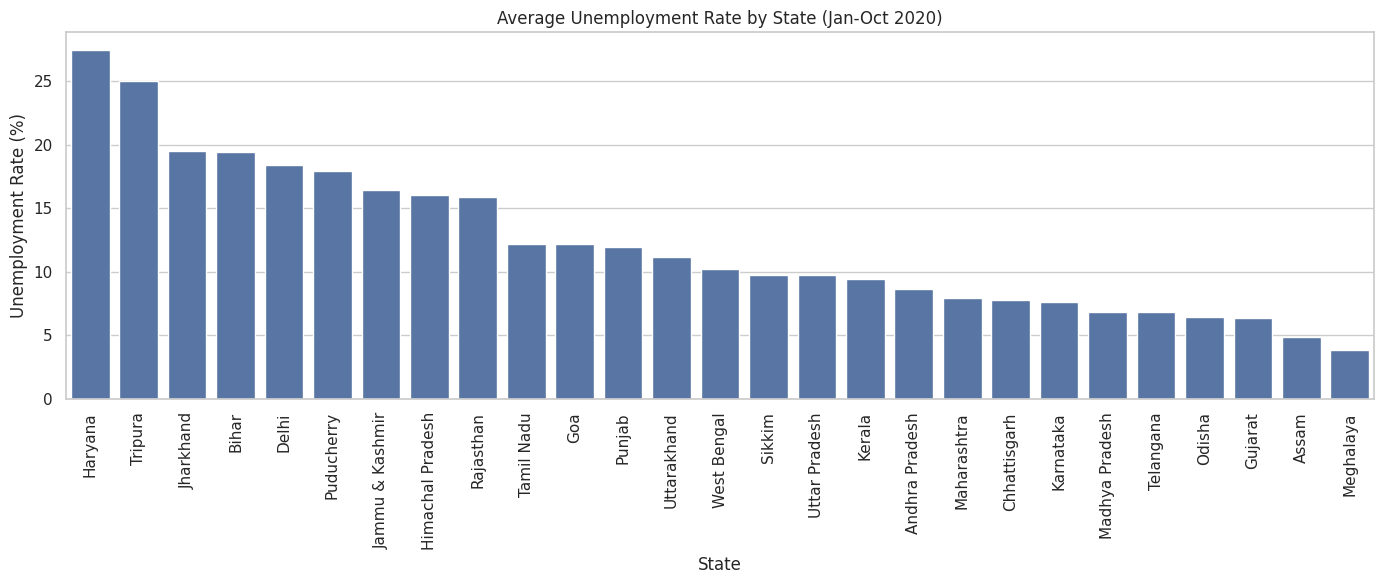

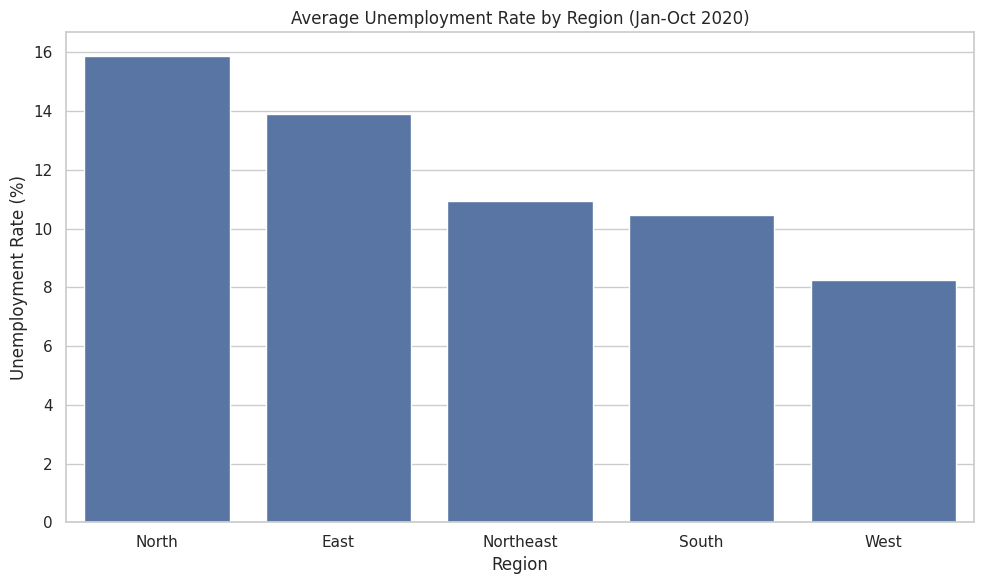

In [14]:
# Step 9: Analyze by State and Region
# Average unemployment rate by state
plt.figure(figsize=(14, 6))
state_avg = df.groupby('State')['Unemployment_Rate'].mean().sort_values(ascending=False)
sns.barplot(x=state_avg.index, y=state_avg.values)
plt.title('Average Unemployment Rate by State (Jan-Oct 2020)')
plt.xlabel('State')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Average unemployment rate by region
plt.figure(figsize=(10, 6))
region_avg = df.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False)
sns.barplot(x=region_avg.index, y=region_avg.values)
plt.title('Average Unemployment Rate by Region (Jan-Oct 2020)')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()
plt.show()

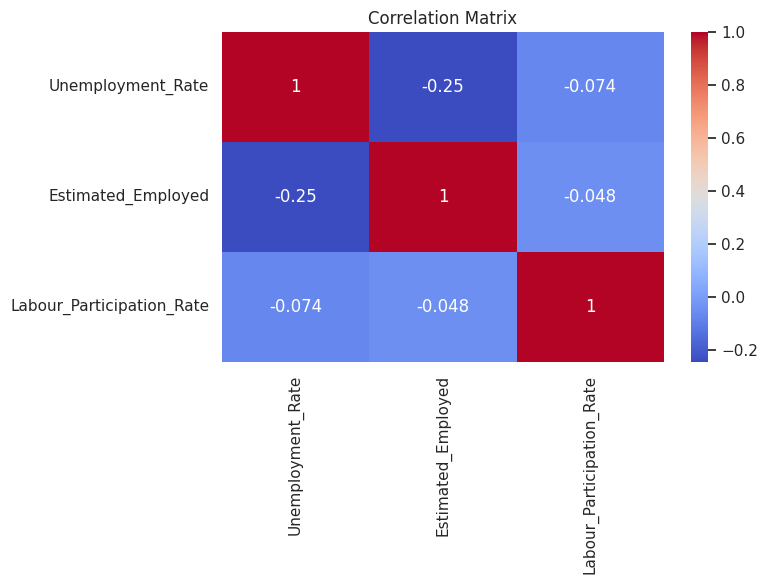

In [15]:
# Step 10: Correlation Analysis
# Correlation between Unemployment Rate, Estimated Employed, and Labour Participation Rate
numeric_cols = ['Unemployment_Rate', 'Estimated_Employed', 'Labour_Participation_Rate']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [17]:
# Step 11: Save Cleaned Dataset
output_path = '/content/Unemployment_Rate_upto_11_2020.csv'
df.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to '{output_path}'")


Cleaned dataset saved to '/content/Unemployment_Rate_upto_11_2020.csv'


In [18]:
# Step 12: Insights and Policy Recommendations
print("\nKey Insights and Policy Recommendations:")
print("- The unemployment rate surged during the COVID-19 peak (Apr-May 2020), reaching",
      round(covid_peak_avg, 2), "%, compared to", round(pre_covid_avg, 2),
      "% pre-COVID, due to lockdown restrictions.")
print("- States like Puducherry and Jharkhand experienced extreme unemployment spikes (up to 75.85% and 59.23%), indicating severe economic disruption.")
print("- Northern and Northeastern regions had higher average unemployment rates, suggesting regional disparities in economic resilience.")
print("- Seasonal trends show April-May as outliers due to COVID-19; otherwise, unemployment stabilized post-June.")
print("- **Policy Recommendations**:")
print("  - Implement targeted job creation programs in high-unemployment states like Puducherry and Jharkhand.")
print("  - Enhance upskilling and reskilling initiatives to support workers affected by lockdown-related job losses.")
print("  - Strengthen social safety nets (e.g., unemployment benefits) in Northern and Northeastern regions.")
print("  - Promote digital and remote work opportunities to mitigate future disruptions.")
print("  - Regular monitoring of unemployment data to anticipate and address economic shocks.")


Key Insights and Policy Recommendations:
- The unemployment rate surged during the COVID-19 peak (Apr-May 2020), reaching 22.75 %, compared to 9.76 % pre-COVID, due to lockdown restrictions.
- States like Puducherry and Jharkhand experienced extreme unemployment spikes (up to 75.85% and 59.23%), indicating severe economic disruption.
- Northern and Northeastern regions had higher average unemployment rates, suggesting regional disparities in economic resilience.
- Seasonal trends show April-May as outliers due to COVID-19; otherwise, unemployment stabilized post-June.
- **Policy Recommendations**:
  - Implement targeted job creation programs in high-unemployment states like Puducherry and Jharkhand.
  - Enhance upskilling and reskilling initiatives to support workers affected by lockdown-related job losses.
  - Strengthen social safety nets (e.g., unemployment benefits) in Northern and Northeastern regions.
  - Promote digital and remote work opportunities to mitigate future disruptio